# Assignment 2 Deep Learning

## Michael Jones

## 6/16/2025


### Import Libraries

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


### Load and Split Data

In [5]:

x_train_original = np.loadtxt('mnist_training.csv', delimiter=',')/255
y_train_original = np.loadtxt('mnist_train_class.csv', delimiter=',')
x_test_original = np.loadtxt('mnist_testing.csv', delimiter=',')/255
y_test_original= np.loadtxt('mnist_test_class.csv', delimiter=',')

x, x_train_small, y, y_train_small = train_test_split(x_train_original, y_train_original, test_size=0.1, random_state=42)


print(x_train_small.shape)
print(x_test_original.shape)
print(y_train_small.shape)
print(y_test_original.shape)



(6000, 784)
(10000, 784)
(6000,)
(10000,)


In [6]:
y_train_small = y_train_small.astype(int)
y_test_original = y_test_original.astype(int)
print(np.unique(y_train_small))
print(np.unique(y_test_original))

NB_CLASSES = 10 #number of classes
print('shape of y_train and y_test before categorical')
print(y_train_original.shape)
print(y_test_original.shape)
y_train= to_categorical(y_train_original, NB_CLASSES)
y_test= to_categorical(y_test_original, NB_CLASSES)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print('shape of y_train and y_test after categorical')
print(y_train.shape)
print(y_test.shape)


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
shape of y_train and y_test before categorical
(60000,)
(10000,)
shape of y_train and y_test after categorical
(60000, 10)
(10000, 10)


In [7]:
NB_EPOCH = 150 # number of epoch
BATCH_SIZE = 30 # mini batch size
VERBOSE = 1 #display results during training
OPTIMIZER = SGD() # choose optimizer
VALIDATION_SPLIT = 0.2 #80% training and 20%validation
METRICS =['accuracy']

### Model 1 Baseline

In [9]:
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],)))
model1.add(Dense(10, activation='softmax'))
print(model1.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
filepath = "model1.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

Tuning_model1 = model1.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

C:\Users\mrj13\anaconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
156/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1004 - loss: 2.4321    
Epoch 1: val_loss improved from inf to 2.30227, saving model to model1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1006 - loss: 2.4295 - val_accuracy: 0.1117 - val_loss: 2.3023
Epoch 2/150
143/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1018 - loss: 2.3023 
Epoch 2: val_loss improved from 2.30227 to 2.30151, saving model to model1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1019 - loss: 2.3023 - val_accuracy: 0.1058 - val_loss: 2.3015
Epoch 3/150
145/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0981 - loss: 2.3011 
Epoch 3: val_loss improved from 2.30151 to 2.30120, saving model to model1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0988 - loss: 2.3011 - val_accuracy: 0.1142 - val_loss: 2.3012
Epoch 4/150
147/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1163 - loss: 2.3006 
Epoch 4: val_loss improved from 2.30120 to 2.30097

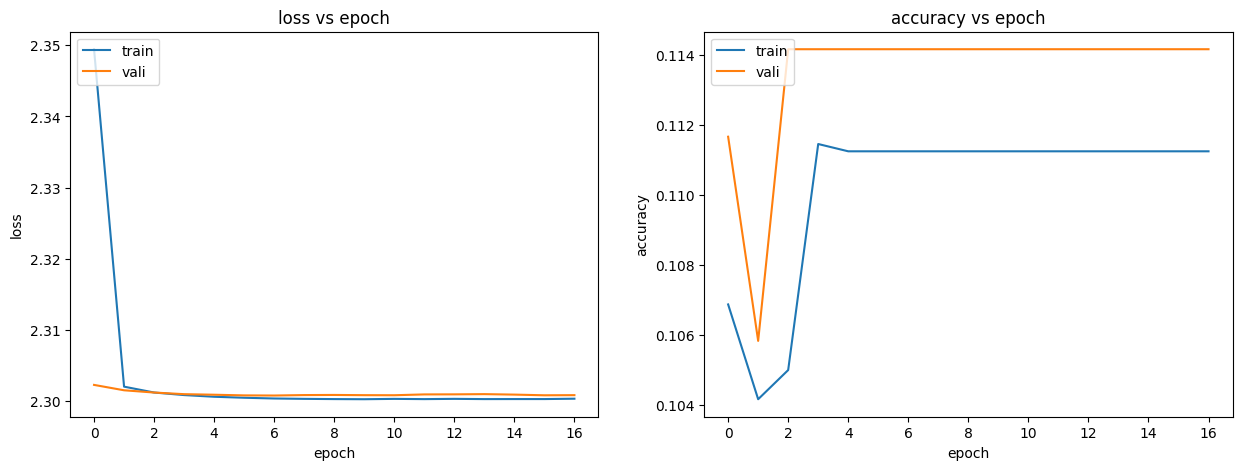

In [10]:
def plotHistory(Tuning):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(Tuning.history['loss'])
    axs[0].plot(Tuning.history['val_loss'])
    axs[0].set_title('loss vs epoch')
    #axs[0].set_ylim(0.0,0.7)
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'vali'], loc='upper left')
    
    axs[1].plot(Tuning.history['accuracy'])
    axs[1].plot(Tuning.history['val_accuracy'])
    axs[1].set_title('accuracy vs epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    #axs[1].set_ylim(0.5,1)
    axs[1].legend(['train', 'vali'], loc='upper left')
    plt.show(block = False)
    plt.show()

plotHistory(Tuning_model1)   

### Model 1 with Dropout

In [12]:
model1_dropout = Sequential()
model1_dropout.add(Dense(100, activation='relu', input_shape=(x_train_small.shape[1],)))
model1_dropout.add(Dropout(0.25))
model1_dropout.add(Dense(10, activation='softmax'))
print(model1_dropout.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
filepath = "model1_dropout.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)

model1_dropout.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

Tuning_model1_dropout = model1_dropout.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
144/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1125 - loss: 2.3810 
Epoch 1: val_loss improved from inf to 2.30202, saving model to model1_dropout.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1115 - loss: 2.3754 - val_accuracy: 0.0875 - val_loss: 2.3020
Epoch 2/150
144/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1051 - loss: 2.3014 
Epoch 2: val_loss improved from 2.30202 to 2.30125, saving model to model1_dropout.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1051 - loss: 2.3014 - val_accuracy: 0.1058 - val_loss: 2.3013
Epoch 3/150
153/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1041 - loss: 2.3005 
Epoch 3: val_loss improved from 2.30125 to 2.30104, saving model to model1_dropout.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1040 - loss: 2.3005 - val_accuracy: 0.1142 - val_loss: 2.3010
Epoch 4/150
149/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1096 - loss: 2.3006 
Epoch 4: val_loss improved fr

### Plotting Model 1 with Dropout

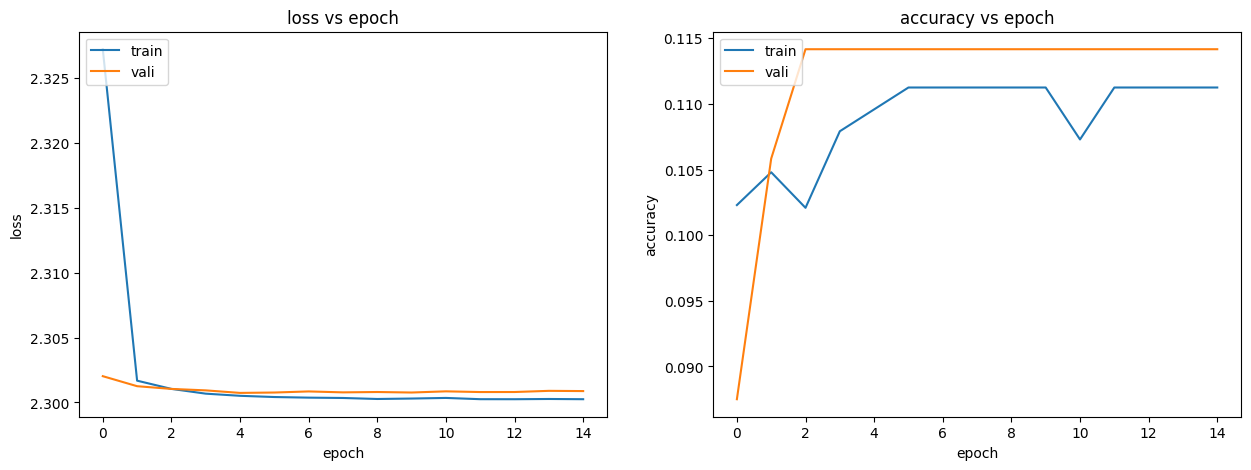

In [14]:
plotHistory(Tuning_model1_dropout)    

## Model 2

### Model 2 Baseline

In [17]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
model2 = Sequential()
model2.add(Dense(500,input_shape=(x_train_small.shape[1],)))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
print(model2.summary())

early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 10)

filepath="best_model2.keras"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics =METRICS)
Tuning_model2 = model2.fit(x_train_small,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                               validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 898,510 (3.43 MB)

 Trainable params: 898,510 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0994 - loss: 2.3893
Epoch 1: val_loss improved from inf to 2.30086, saving model to best_model2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0994 - loss: 2.3890 - val_accuracy: 0.1150 - val_loss: 2.3009
Epoch 2/150
159/160 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1067 - loss: 2.3040
Epoch 2: val_loss did not improve from 2.30086
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1067 - loss: 2.3040 - val_accuracy: 0.1142 - val_loss: 2.3016
Epoch 3/150
156/160 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1027 - loss: 2.3010
Epoch 3: val_loss did not improve from 2.30086
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1028 - loss: 2.3010 - val_accuracy: 0.1142 - val_loss: 2.3010
Epoch 4/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1127 - loss: 2.3003
Epoch 4: val_loss did not improve from 2.30086
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1126 - los

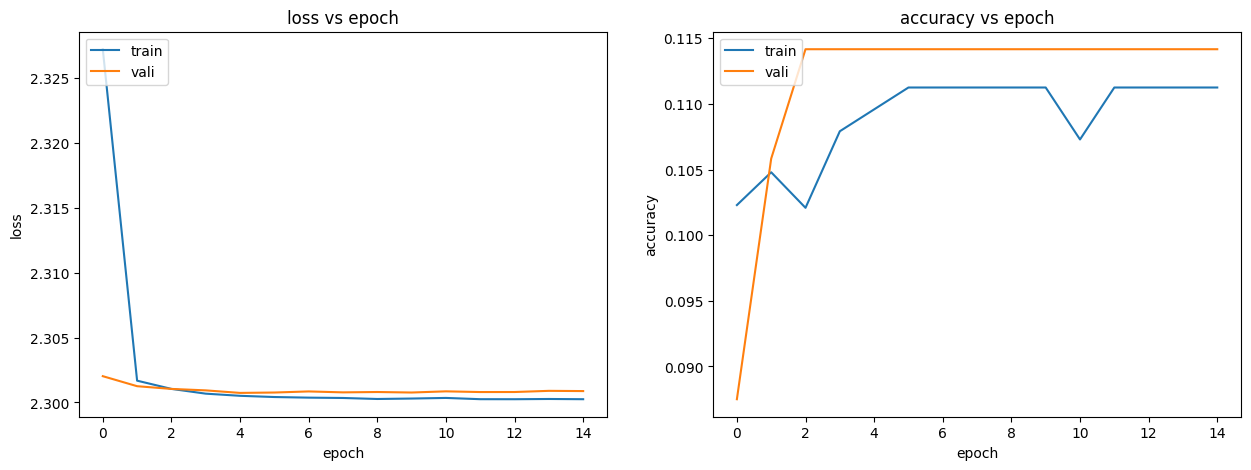

In [18]:
plotHistory(Tuning_model2) 

### Model 2 with L1 and Dropout

In [20]:
model_l1 = Sequential([
    Dense(500, activation='relu', input_shape=(x_train_small.shape[1],),
          kernel_regularizer=regularizers.l1(0.00001)),
    Dropout(0.25),
    Dense(200, activation='relu', kernel_regularizer=regularizers.l1(0.00001)),
    Dropout(0.25),
    Dense(NB_CLASSES, activation='softmax')
])

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=8)
model_l1.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
checkpoint = ModelCheckpoint("model_l1.keras", monitor='val_loss', verbose=1, save_best_only=True)

Tuning_model_l1 = model_l1.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
156/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1020 - loss: 2.6258
Epoch 1: val_loss improved from inf to 2.44346, saving model to model_l1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1019 - loss: 2.6225 - val_accuracy: 0.1142 - val_loss: 2.4435
Epoch 2/150
154/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1088 - loss: 2.4418 
Epoch 2: val_loss improved from 2.44346 to 2.43054, saving model to model_l1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1086 - loss: 2.4417 - val_accuracy: 0.1058 - val_loss: 2.4305
Epoch 3/150
153/160 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0978 - loss: 2.4327 
Epoch 3: val_loss improved from 2.43054 to 2.41807, saving model to model_l1.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0978 - loss: 2.4325 - val_accuracy: 0.0925 - val_loss: 2.4181
Epoch 4/150
158/160 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1129 - loss: 2.4127 
Epoch 4: val_loss improved from 2.41807 to 2.40454,

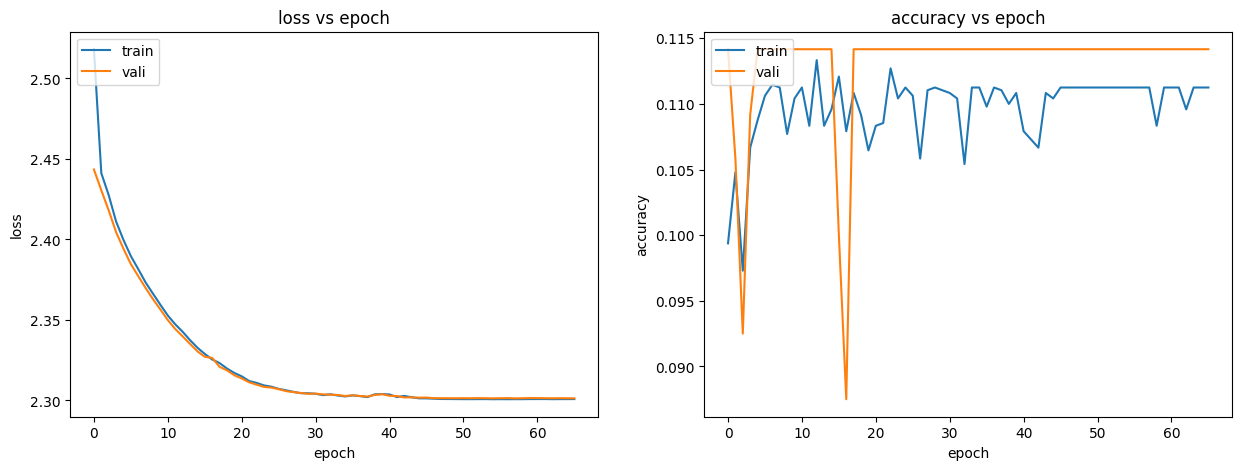

In [21]:
plotHistory(Tuning_model_l1)  

### Model 2 with L2 and Dropout

In [23]:
model_l2 = Sequential([
    Dense(500, activation='relu', input_shape=(x_train_small.shape[1],),
          kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.25),
    Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.25),
    Dense(NB_CLASSES, activation='softmax')
])

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=8)
model_l2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=METRICS)
checkpoint = ModelCheckpoint("model_l2.keras", monitor='val_loss', verbose=1, save_best_only=True)

Tuning_model_l2 = model_l2.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
154/160 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1100 - loss: 2.6054 
Epoch 1: val_loss improved from inf to 2.36358, saving model to model_l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1099 - loss: 2.5991 - val_accuracy: 0.1017 - val_loss: 2.3636
Epoch 2/150
158/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1039 - loss: 2.3673 
Epoch 2: val_loss improved from 2.36358 to 2.35879, saving model to model_l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1039 - loss: 2.3673 - val_accuracy: 0.1142 - val_loss: 2.3588
Epoch 3/150
158/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1176 - loss: 2.3564 
Epoch 3: val_loss improved from 2.35879 to 2.35304, saving model to model_l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1174 - loss: 2.3564 - val_accuracy: 0.1142 - val_loss: 2.3530
Epoch 4/150
155/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1028 - loss: 2.3515 
Epoch 4: val_loss improved from 2.35304 to 2.34824, 

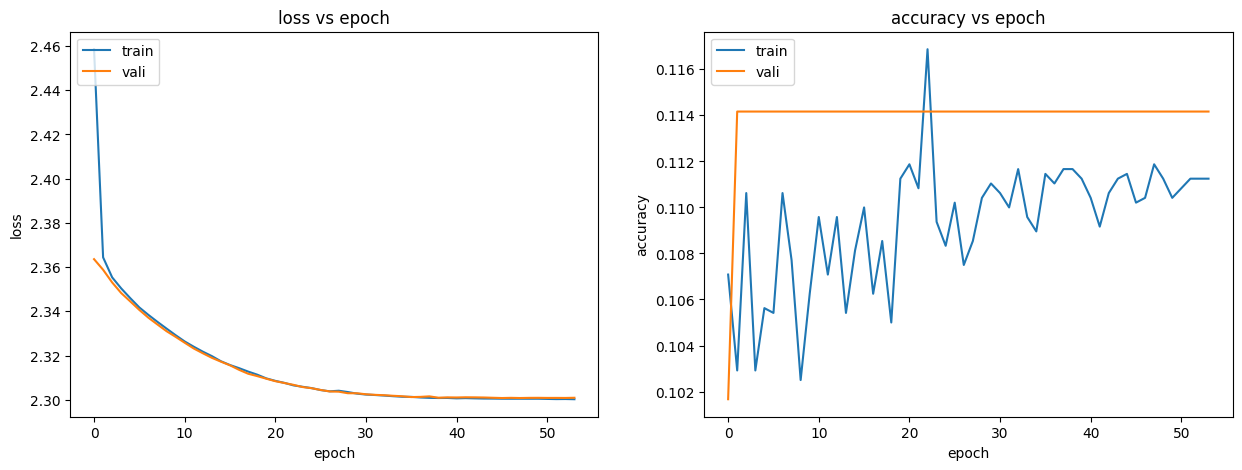

In [24]:
plotHistory(Tuning_model_l2)  

### Model 2 with L1/L2 and Dropout

In [26]:
model_l1l2 = Sequential([
    Dense(500, activation='relu', input_shape=(x_train_small.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0001)),
    Dropout(0.25),
    Dense(200, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001)),
    Dropout(0.25),
    Dense(NB_CLASSES, activation='softmax')
])

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=8)
model_l1l2.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
checkpoint = ModelCheckpoint("model_l1l2.keras", monitor='val_loss', verbose=1, save_best_only=True)

Tuning_model_l1l2 = model_l1l2.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
157/160 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1043 - loss: 27.1977 
Epoch 1: val_loss improved from inf to 3.19897, saving model to model_l1l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1043 - loss: 26.8822 - val_accuracy: 0.0892 - val_loss: 3.1990
Epoch 2/150
157/160 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1049 - loss: 2.8851
Epoch 2: val_loss improved from 3.19897 to 2.55736, saving model to model_l1l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1050 - loss: 2.8810 - val_accuracy: 0.1075 - val_loss: 2.5574
Epoch 3/150
156/160 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1021 - loss: 2.5445
Epoch 3: val_loss improved from 2.55736 to 2.52357, saving model to model_l1l2.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1024 - loss: 2.5442 - val_accuracy: 0.1058 - val_loss: 2.5236
Epoch 4/150
155/160 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1124 - loss: 2.5203 
Epoch 4: val_loss improved from 2.52357 to 

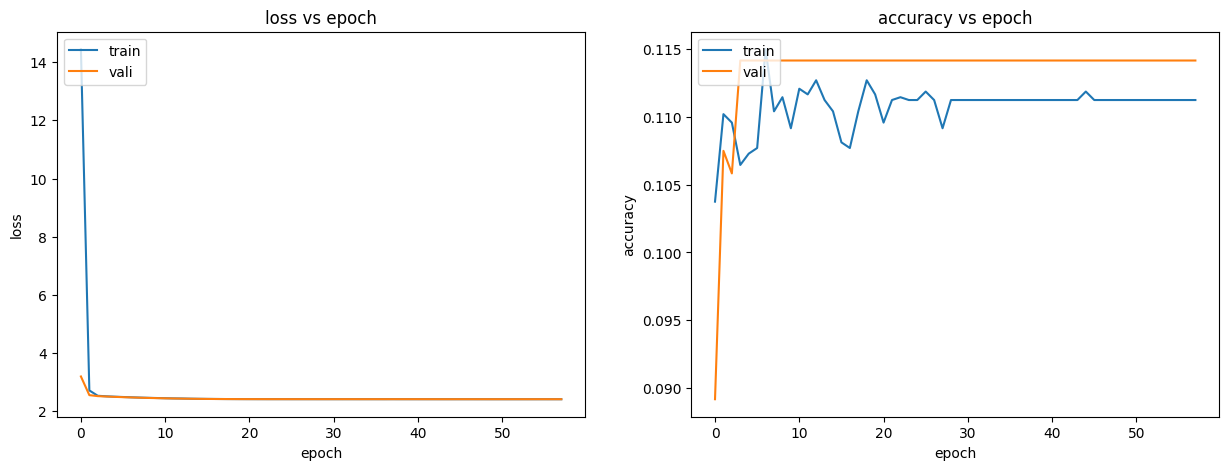

In [27]:
plotHistory(Tuning_model_l1l2)  

### Model 2 with Batch Normalization and Dropout

In [29]:
model_bn = Sequential([
    Dense(200, input_shape=(x_train_small.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    Dense(200),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    Dense(NB_CLASSES, activation='softmax')
])

early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=10)
model_bn.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
checkpoint = ModelCheckpoint("model_bn.keras", monitor='val_loss', verbose=1, save_best_only=True)

Tuning_model_bn = model_bn.fit(
    x_train_small, y_train,
    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
    callbacks=[checkpoint, early_stopping_monitor]
)

Epoch 1/150
159/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0933 - loss: 2.7030 
Epoch 1: val_loss improved from inf to 2.46341, saving model to model_bn.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0933 - loss: 2.7019 - val_accuracy: 0.1017 - val_loss: 2.4634
Epoch 2/150
157/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1420 - loss: 2.3677 
Epoch 2: val_loss improved from 2.46341 to 2.44274, saving model to model_bn.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1419 - loss: 2.3680 - val_accuracy: 0.0967 - val_loss: 2.4427
Epoch 3/150
157/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1526 - loss: 2.3172 
Epoch 3: val_loss improved from 2.44274 to 2.43364, saving model to model_bn.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1525 - loss: 2.3174 - val_accuracy: 0.1008 - val_loss: 2.4336
Epoch 4/150
156/160 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1648 - loss: 2.2692 
Epoch 4: val_loss improved from 2.43364 to 2.41478, 

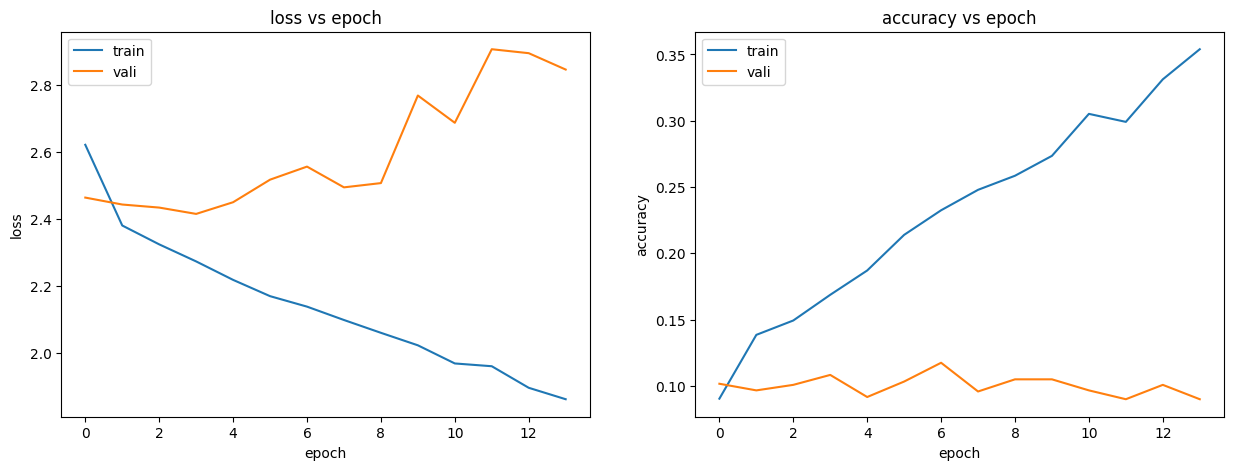

In [30]:
plotHistory(Tuning_model_bn)  

In [31]:
# Summary of best validation metrics for each model
results = {
    'Baseline': {
        'val_accuracy': max(Tuning_model2.history['val_accuracy']),
        'val_loss': min(Tuning_model2.history['val_loss']),
    },
    'L1': {
        'val_accuracy': max(Tuning_model_l1.history['val_accuracy']),
        'val_loss': min(Tuning_model_l1.history['val_loss']),
    },
    'L2': {
        'val_accuracy': max(Tuning_model_l2.history['val_accuracy']),
        'val_loss': min(Tuning_model_l2.history['val_loss']),
    },
    'L1+L2': {
        'val_accuracy': max(Tuning_model_l1l2.history['val_accuracy']),
        'val_loss': min(Tuning_model_l1l2.history['val_loss']),
    },
    'BatchNorm': {
        'val_accuracy': max(Tuning_model_bn.history['val_accuracy']),
        'val_loss': min(Tuning_model_bn.history['val_loss']),
    }
}

# Optional: Display nicely
import pandas as pd
pd.DataFrame(results).T

,val_accuracy,val_loss
Baseline,0.115000,2.300458
L1,0.114167,2.301260
L2,0.114167,2.300794
L1+L2,0.114167,2.417298
BatchNorm,0.117500,2.414783
